<a href="https://colab.research.google.com/github/dhynasah/Least-squares-regression/blob/master/Dyno_coding_challenge_Dhynasah_Cakir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install fuzzywuzzy[speedup]
! pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.2 MB/s 
     |████████████████████████████████| 2.2 MB 39.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz

# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create pandas dataframe from transduction ngs reads data
trans_reads_df = pd.read_csv("/content/drive/MyDrive/Dyno CB-NDT Challenge I/challenge data/part1_input/transduction_ngs_reads.txt", header=None)
# add column name
trans_reads_df.columns = ['reads']

In [ ]:
# Create pandas dataframe from design info csv
barcode_df = pd.read_csv('/content/drive/MyDrive/Dyno CB-NDT Challenge I/challenge data/part1_input/design_info.csv')

In [ ]:
len(barcode_df['barcode'].unique())

3000

In [ ]:
#check if flanking sections are all the same throught the dataset
fl_region_1_subset = trans_reads_df[True == trans_reads_df['reads'].str.contains('GATAACCGT')]
len(fl_region_1_subset)
# this shows us that all flanking regions are mostly the same except for mutations.
# determine unique reads count.
# this is an approximation since we have to account for mutations
len(trans_reads_df['reads'].unique())
result = trans_reads_df['reads'].apply(len).mean()
result

47.9999

In [ ]:
def flatten2list(object):
    gather = []
    for item in object:
        if isinstance(item, (list, tuple, set)):
            gather.extend(flatten2list(item))            
        else:
            gather.append(item)
    return gather

In [ ]:
# threshold: 0.904 = 1-((3x0.002) * 16)
threshold = 90
read = "GATAACCGTCAACCGCCTAGAAGGGCGAGTATACGCGTTGGAACCCAT"
read_list = process.extractBests(read,trans_reads_df['reads'],limit=100, score_cutoff=threshold)
read_2 = 'GATAACCGTCTTGAATAGGCGGCAACGAGTATACACGGTGGAACCCAT'
read_list2 =  process.extractBests(read_2,trans_reads_df['reads'],limit=100, score_cutoff=threshold)

In [ ]:
flat_list = flatten2list(read_list2)
flat_list.append(read_list)
flatten2list(flat_list)


In [ ]:
# threshold: 99.096 = 100-((3x0.002) * 16)
#this doesn't work well. It can take up to 20 minutes to run.
threshold = 98
nested_read_list = []
flat_list = []
for read in trans_reads_df['reads']:
  if (read in flat_list):
    continue
  read_list = process.extractBests(read,trans_reads_df['reads'],limit=100, score_cutoff=threshold)
  nested_read_list.append(read_list)
  flat_list.append(read_list)
  flat_list = flatten2list(flat_list)

In [ ]:
print(len(nested_read_list))
print(len(flat_list))

In [ ]:
nested_read_list[0:5]

[[('GATAACCGTCTAATCTTAGACAGCGCGAGTATACGTGTTGGAACCCAT', 100, 0),
  ('GATAACCGTCTAATCTTAGACAGCGCGAGTATACGGTTTGGAACCCAT', 98, 324),
  ('GATAACCGTCTAATCTTAGACAGCGCGAGTATACCGTGTGGAACCCAT', 98, 427),
  ('GATAACCGTCTAATCTTAGACAGCGCGAGTATACGATGTGGAACCCAT', 98, 522),
  ('GATAACCGTCTAATCTTAGACAGCGCGAGTATACAGTTTGGAACCCAT', 98, 2911),
  ('GATAACCGTCTAATCTTAGACAGCGCGAGTATACGTTCTGGAACCCAT', 98, 4856),
  ('GATAACCGTCTAATCTTAGACAGCGCGAGTATACTGATTGGAACCCAT', 98, 5066),
  ('GATAACCGTCTAATCTTAGACAGCGCGAGTATACTTGTTGGAACCCAT', 98, 6747)],
 [('GATAACCGTCTTGAATAGGCGGCAACGAGTATACGCCTTGGAACCCAT', 100, 1)],
 [('GATAACCGTGCATTCATAAGCAGTTCGAGTATACTGGATGGAACCCAT', 100, 2),
  ('GATAACCGTGCATTCATAAGCAGTTCGAGTATACATGATGGAACCCAT', 98, 2871)],
 [('GATAACCGTTCTTTTAAGCGTCCTTCGAGTATACGGGGTGGAACCCAT', 100, 3),
  ('GATAACCGTTCTTTTAAGCGTCCTTCGAGTATACGGGGTGGAACCCAT', 100, 6948),
  ('GATAACCGTTCTTTTAAGCGTCCTTCGAGTATACGGTGTGGAACCCAT', 98, 1213),
  ('GATAACCGTTCTTTTAAGCGTCCTTCGAGTATACCGGGTGGAACCCAT', 98, 2545),
  ('GATAACCGTTCTT

In [ ]:
# sort each group by barcode. there may be multiple groups with the same barcode. thats the umi difference 

In [ ]:
for group in nested_read_list:
  flat_group = flatten2list(group)
  is_integer = lambda s: s.isdigit() or (s[0] == '-' and s[1:].isdigit())
  flat_group = filter(is_integer, flat_group)
  barcode_df
  # if barcode is in all values: 
    # new_barcode_df = pd.Dataframe(columns = ['barcode','umi','count'])
    # 

In [ ]:
# remove flanking regions based on character length
# replace with white space
#use process.extract to group all reads with the same umi. count and match with barcode
# create a new dataframe with barcode, umi, count
flanking_regions_len = [9,8,10]   # flanking region 2 is from 26-33 included TATA which is the linker to the umi
#umi is 5 base pairs long: from 34-39

In [ ]:
# option 2 
# remove all flanking regions from all reads using process.extractBest???
#use flanking regions as delimiters
#split read: '[barcode],[umi]'
# use process.extractBest to group all reads with same umi. or read[1] together. place in a list and count
# add barcode, umi, and count to new dataframe 

In [ ]:
flanking_regions = ['GATAACCGT','CGAGTATA','TGGAACCCAT']
for i in flanking_regions:
  if flanking_regions.index == 0:
    #process.extractBest should go here somewhere
    trans_reads_df['modified_reads'] = trans_reads_df['reads']
  trans_reads_df['modified_reads'] = trans_reads_df['modified_reads'].str.replace(i," ")

In [ ]:
trans_reads_df.head()

,reads,modified_reads
0,GATAACCGTCTAATCTTAGACAGCGCGAGTATACGTGTTGGAACCCAT,CTAATCTTAGACAGCG CGTGT
1,GATAACCGTCTTGAATAGGCGGCAACGAGTATACGCCTTGGAACCCAT,CTTGAATAGGCGGCAA CGCCT
2,GATAACCGTGCATTCATAAGCAGTTCGAGTATACTGGATGGAACCCAT,GCATTCATAAGCAGTT CTGGA
3,GATAACCGTTCTTTTAAGCGTCCTTCGAGTATACGGGGTGGAACCCAT,TCTTTTAAGCGTCCTT CGGGG
4,GATAACCGTCACGAGAGACTGGCGACGAGTATACAAAGTGGAACCCAT,CACGAGAGACTGGCGA CAAAG


In [ ]:
barcode_umi_df =  trans_reads_df['modified_reads'].str.split(" ", expand = True)
barcode_umi_df.head()

In [ ]:
barcode_umi_df = barcode_umi_df.drop(columns=[0,3])

In [ ]:
# groupby umi and count... some how add in process.exctractbest to groupby umi step



*   in trans_reads_df remove flanking regions and replace with spaces. split and create a list of barcode and umi. place each item in the list in new columns: barcode, umi. 
*   from barcode column compare with barcode_df and find approximate matches using *get_close_matches()*
*   
*   List item





find the approximate matches of the reads...not the barcode. then groupby and count. 

afterwards then i can remove barcode and flanking regions to get the umi

Part 2 
the number of RNA molecules is
proportional to the number of unique UMIs

In [ ]:
desgin_info_df = pd.read_csv('/content/drive/MyDrive/Dyno CB-NDT Challenge I/challenge data/part2_input/design_info.csv')
transd_read_counts_1 = pd.read_csv('/content/drive/MyDrive/Dyno CB-NDT Challenge I/challenge data/part2_input/transduction_read_counts_1.csv')
transd_read_counts_2 = pd.read_csv('/content/drive/MyDrive/Dyno CB-NDT Challenge I/challenge data/part2_input/transduction_read_counts_2.csv')
transd_read_counts_3 = pd.read_csv('/content/drive/MyDrive/Dyno CB-NDT Challenge I/challenge data/part2_input/transduction_read_counts_3.csv')
viral_read_counts = pd.read_csv('/content/drive/MyDrive/Dyno CB-NDT Challenge I/challenge data/part2_input/virus_read_counts.csv')

In [ ]:
transd_read_counts_1.head()

,barcode,umi,count
0,AAAACTTGATAGATAG,AAAC,33
1,AAAACTTGATAGATAG,AAAG,31
2,AAAACTTGATAGATAG,AAAT,24
3,AAAACTTGATAGATAG,AACC,50
4,AAAACTTGATAGATAG,AACG,20


Comparing experimental replicates

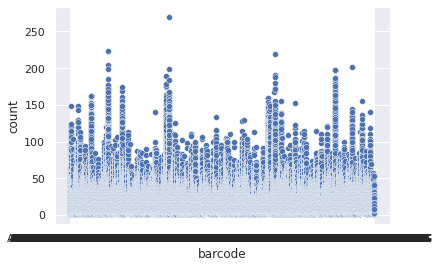

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style= 'darkgrid')
sns.scatterplot(data=transd_read_counts_1, x='barcode',y='count')
plt.show()